In [55]:
using LinearAlgebra
using Plots
using LaTeXStrings
using Printf
using QuantumOptics

In [4]:
"""
Args:
    N: number of point generated
    dim: dimension of the space
    a: scaling factor 
Return:
    an array of N random location vectors, in given dimension, scaled by a
"""
function rand_loc(N::Int,dim::Int,a=1.0::Float64)::Array{Vector{Float64}}
    a*collect(rand(Float64,dim) for i in 1:N)
end;

In [5]:
"""
Args:
    r: point vectors from one loc to another  
    vec1,vec2:location vectors
Return:
    D: coefficient of the dipolar interaction
"""
function dipolar_coef(r::Vector{Float64})
    cosθ=r[end]/norm(r) #calculate the cos(θ) between the vector and the z axis
    D=0.5(1-3cosθ^2)/norm(r)^3
    return D
end;

function dipolar_coef(vec1::Vector{Float64},vec2::Vector{Float64})
    return dipolar_coef(vec1-vec2)
end;


In [6]:
"""
Args:
    vec0: the location of the center spin
    vec_bath: the location set of the spins in environment
Returns:
    the list of dipolar coupling strength between the centered spin and bath
"""
function dipolar_bath_coefs(vec0::Vector{Float64},vec_bath::Array{Vector{Float64}})
    map(x->dipolar_coef(vec0,x),vec_bath)
end;

In [7]:
"""
Args:
    t: time, float
    D: coupling strength of dipolar interactions, usually a array of floats
Returns:
    ensemble free induction decay curve at given time t
"""
function ensemble_FID(t::Float64,D::Vector{Float64})
    return mapreduce(cos,*,D*t)/2
end;

In [48]:
"""
main session of the workflow.
calculate the decaying curve given by a given set of parameter
"""
function main(T::Float64,N::Int, p0::Vector{Float64},d::Int,a::Float64)
    bath=map(x->x+p0,rand_loc(N,d,a))
    coeff_sample=dipolar_bath_coefs(p0,bath);
    bin_set=range(-10/a^d, 10/a^d, length = 60)
    fig1=histogram(coeff_sample, bins = bin_set)
    println("max: ",maximum(coeff_sample)," min: ",minimum(coeff_sample))
    time=range(0,T,length=1001)
    decay_curve=map(t->ensemble_FID(t,coeff_sample),time)
    fig2=plot(time,decay_curve,xformatter=:scientific,xlabel=L"t", ylabel=L"$\langle S_x(t) \rangle$")
    display(fig1)
    display(fig2)
end;

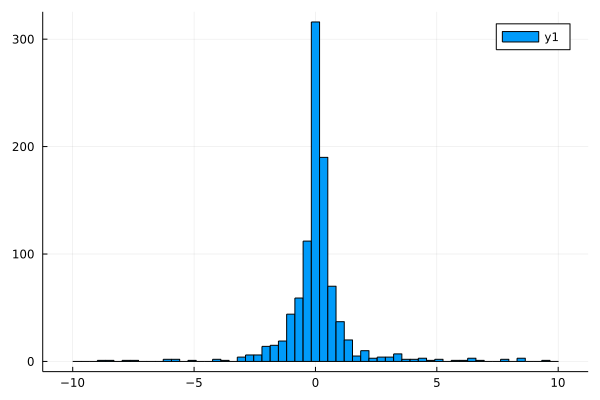

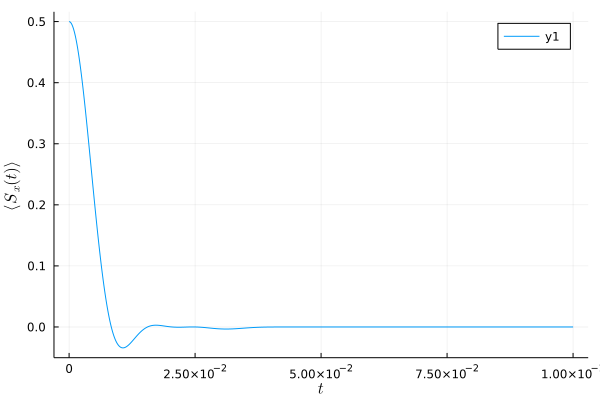

max: 101.00460985318519 min: -187.6527268252906


In [54]:
main(0.1,10^3,[1.0,1.0,1.0],3,1.0)

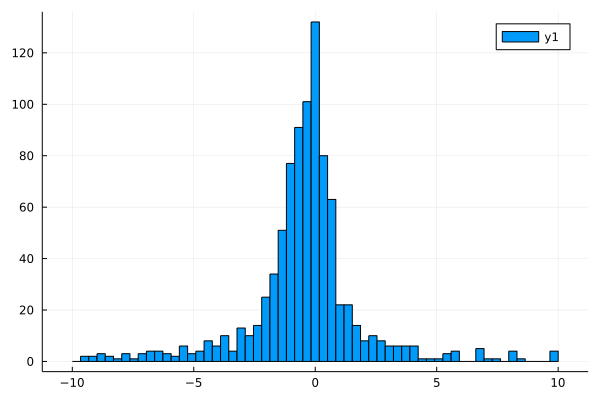

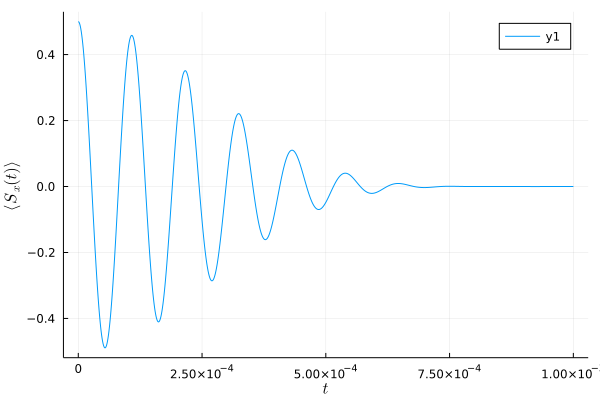

max: 57904.310980622715 min: -1828.5975455482549


In [53]:
main(1e-3,10^3,[1.0,1.0],2,1.0)